In [1]:
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

In [2]:
dataset = pandas.read_csv('train.csv')

In [3]:
X = dataset.loc[ : , dataset.columns != 'y']
y = dataset["y"]

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [10]:
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  46  47  48  49  50  51  52  53  54  55  57
  58  59  60  61  62  63  64  65  67  70  71  72  73  74  75  76  77  79
  80  81  83  84  85  86  87  88  89  90  91  92  93  94  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 116 117 118
 119 120 121 122 123 124 125 126 127 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 153 154 155 156
 157 159 160 161 162 163 164 166 167 168 169 171 172 173 175 176 178 179
 180 181 183 184 185 187 188 189 190 191 192 193 194 195 196 197 198 199] 

Test Index:  [ 15  30  45  56  66  68  69  78  82  95 115 128 152 158 165 170 174 177
 182 186]
Train Index:  [  0   1   2   3   4   5   6   7   8  10  11  12  13  14  15  17  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  

In [11]:
best_svr.fit(X_train, y_train)
scores.append(best_svr.score(X_test, y_test))

In [12]:
print(np.mean(scores))

0.2877776095264374


In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(best_svr, X, y, cv=10)

array([-0.21849926,  0.13919265,  0.53921232,  0.42124006,  0.165904  ,
        0.3228391 ,  0.48482554,  0.38808503,  0.403444  ,  0.38195559])

In [14]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(best_svr, X, y, cv=10)

array([ 0.6743645 ,  0.05513839,  0.57150824,  0.40131073,  0.05831889,
        0.9655475 ,  0.58390831,  0.42935416,  0.66046932,  0.58711321,
        0.57865763,  0.29070076,  0.25839941,  0.29322615,  0.22969269,
        0.13878133,  0.18223996,  0.9584502 ,  0.38858867,  0.49327272,
        1.3415509 ,  0.52536399,  0.60697477,  0.18387978,  0.63216046,
        0.60516947,  0.06622402,  0.83100848, -0.06203101,  0.77864507,
        0.5423179 , -0.10688373,  1.34223424,  0.76752703,  0.81568602,
        0.81013884,  0.62222022,  0.75245825,  0.10230678,  0.32045009,
        0.74514112,  0.11699728,  0.14168425,  0.57088806,  0.46999619,
        0.04986521,  0.62198371,  0.72163763,  0.1329106 ,  0.49046821,
        0.47388759,  0.68078741, -0.18425914,  0.51551078,  0.70638584,
        0.75540051,  0.27457002,  0.05282023,  0.54206187,  0.70736573,
        1.08477827,  0.28533714,  0.12833576,  0.15399577,  0.10555937,
        0.11666398,  0.49355155,  0.34592816,  0.05394974,  0.12

KNN Hyperparameter Tuning and Visualization


In [30]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=10, 
                                    n_repeats=3, 
                                    random_state=999)

In [31]:
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 
              'p': [1, 2, 5]}

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      return_train_score=True)


In [33]:
gs_KNN.fit(X, y);

Fitting 30 folds for each of 60 candidates, totalling 1800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:   25.2s finished


In [34]:
gs_KNN.best_params_

{'n_neighbors': 17, 'p': 2}

In [35]:
gs_KNN.best_score_

0.7333333333333333

In [36]:
gs_KNN.cv_results_['mean_test_score']

array([0.60333333, 0.605     , 0.58166667, 0.56666667, 0.62      ,
       0.63666667, 0.59833333, 0.645     , 0.63166667, 0.61833333,
       0.65833333, 0.63333333, 0.64833333, 0.66833333, 0.675     ,
       0.65      , 0.655     , 0.67333333, 0.66666667, 0.68666667,
       0.7       , 0.65      , 0.69      , 0.66333333, 0.675     ,
       0.72      , 0.67333333, 0.66833333, 0.71      , 0.68333333,
       0.70166667, 0.72333333, 0.685     , 0.69333333, 0.71666667,
       0.69166667, 0.715     , 0.71333333, 0.68      , 0.69666667,
       0.71833333, 0.69833333, 0.69666667, 0.72      , 0.7       ,
       0.69833333, 0.71666667, 0.70166667, 0.70666667, 0.73333333,
       0.72666667, 0.725     , 0.73      , 0.71666667, 0.72166667,
       0.725     , 0.71666667, 0.72833333, 0.72666667, 0.71833333])

In [38]:
import pandas as pd
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])

In [39]:
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']

In [40]:
results_KNN['metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_KNN

,n_neighbors,p,test_score,metric
0,1,1,0.603333,Manhattan
1,1,2,0.605000,Euclidean
2,1,5,0.581667,Minkowski
3,2,1,0.566667,Manhattan
4,2,2,0.620000,Euclidean
5,2,5,0.636667,Minkowski
6,3,1,0.598333,Manhattan
7,3,2,0.645000,Euclidean
8,3,5,0.631667,Minkowski
9,4,1,0.618333,Manhattan


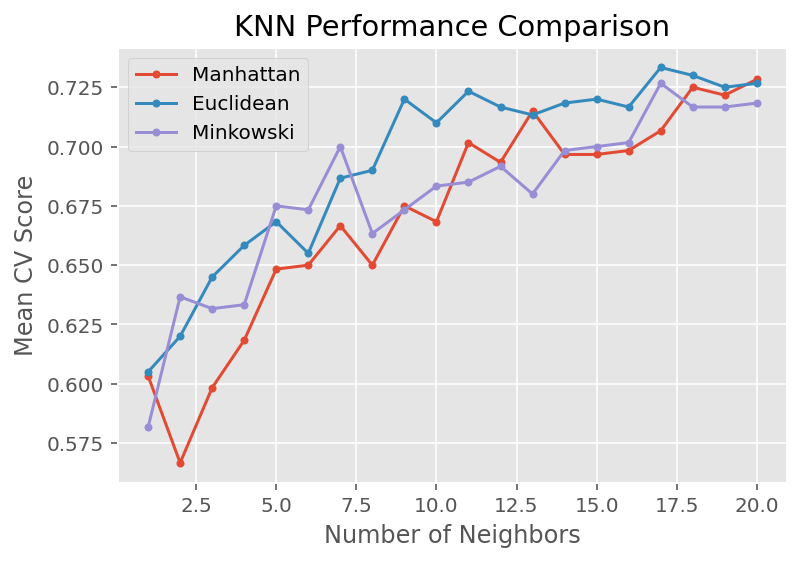

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

for i in ["Manhattan", "Euclidean", "Minkowski"]:
    temp = results_KNN[results_KNN['metric'] == i]
    plt.plot(temp['n_neighbors'], temp['test_score'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score")
plt.title("KNN Performance Comparison")
plt.show()